In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast
from statsforecast.arima import arima_string

In [2]:
import yfinance as yf

stock = "NFLX"
ticker = yf.Ticker(stock)
data = ticker.history(start="2013-01-01", end="2023-12-31", interval="1mo")["Close"]
data.head()

Date
2013-01-01 00:00:00-05:00    23.605715
2013-02-01 00:00:00-05:00    26.868570
2013-03-01 00:00:00-05:00    27.040001
2013-04-01 00:00:00-04:00    30.867144
2013-05-01 00:00:00-04:00    32.321430
Name: Close, dtype: float64

In [3]:
df = pd.DataFrame(data).reset_index()

In [4]:
df['Date'] = df['Date'].dt.tz_localize(None)

In [5]:
df["unique_id"]="Netflix"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,2013-01-01,23.605715,Netflix
1,2013-02-01,26.868570,Netflix
2,2013-03-01,27.040001,Netflix
3,2013-04-01,30.867144,Netflix
4,2013-05-01,32.321430,Netflix


In [6]:
models = [AutoARIMA(season_length=12)]

In [7]:
sf = StatsForecast(df=df,
    models=models,
    freq='MS',
    n_jobs=1,
)

C:\Users\pacol\anaconda3\Lib\site-packages\statsforecast\core.py:474: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [8]:
sf.fit()

C:\Users\pacol\anaconda3\Lib\site-packages\statsforecast\core.py:474: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [9]:
arima_string(sf.fitted_[0,0].model_)

'ARIMA(2,1,0)                   '

In [10]:
x_df = pd.DataFrame({"ds": [pd.to_datetime('2024-01-01'), pd.to_datetime('2024-02-01'), pd.to_datetime('2024-03-01')],
                     "unique_id": ["Remesas", "Remesas", "Remesas"]})
x_df.head()

,ds,unique_id
0,2024-01-01,Remesas
1,2024-02-01,Remesas
2,2024-03-01,Remesas


In [11]:
Y_hat_df = sf.forecast(3, X_df=x_df ,fitted=True)
values = sf.forecast_fitted_values()     

C:\Users\pacol\anaconda3\Lib\site-packages\statsforecast\core.py:474: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
C:\Users\pacol\anaconda3\Lib\site-packages\statsforecast\arima.py:1612: UserWarning: xreg not required by this model, ignoring the provided regressors
  warnings.warn(
C:\Users\pacol\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
C:\Users\pacol\anaconda3\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment vari

In [12]:
df['autoarima_original'] = values['AutoARIMA'].values
df.head()

,ds,y,unique_id,autoarima_original
0,2013-01-01,23.605715,Netflix,23.582109
1,2013-02-01,26.868570,Netflix,23.667139
2,2013-03-01,27.040001,Netflix,27.315296
3,2013-04-01,30.867144,Netflix,27.506388
4,2013-05-01,32.321430,Netflix,31.345575


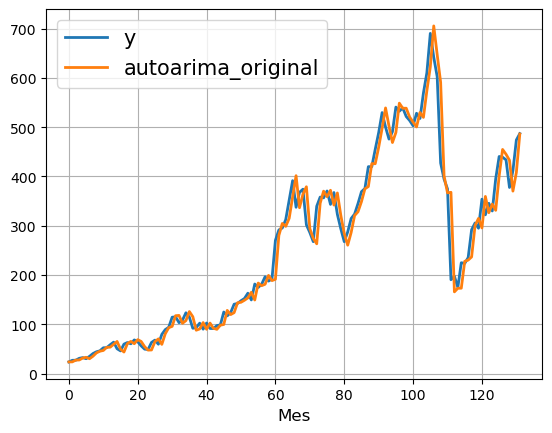

In [13]:
_, ax = plt.subplots(1, 1)
df[['y', 'autoarima_original']].plot(ax=ax, linewidth=2)
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Mes', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)